# Table of Contents
- [Data Processing](#section-1)
- [Running Model](#section-2)
- [Evaluate Prediction](#section-3)
   - [histograph](#section-3-1)
   - [basic statistics mean,median...](#section-3-2)
   - [Threshold Prediction using 0.5 as value](#section-3-3)
   - [Frequency](#section-3-4)
   - [Top 10 non HERG Blocker molecules](#section-3-5)
   - [Top 20 non HERG Blocker molecules](#section-3-6)

<a id='section-1'></a>

# Data processing

In this notebook, I am loading a list smiles molecules I obtained from Ersilia summer 2024 internship slack channel and processing the
- Checking all 1000 smiles are valid smiles
- Standardzing the smiles

In [ ]:
#Import necessary packages and specify the paths to relevant folders
import pandas as pd
import numpy as np
import os
import sys
import json
import matplotlib.pyplot as plt
import csv


In [ ]:
# Add the src directory to the Python module search path
sys.path.append(os.path.abspath("../src"))

#add the input files path
unprocessed = os.path.abspath('../data/reference_library.csv')
input = os.path.abspath('../data/input.csv')
standardize = os.path.abspath('../data/standardized_smiles.csv')
sample = os.path.abspath('../data/sample_smiles.csv')
output = os.path.abspath('../data/output.csv')
tsion = os.path.abspath('../data/sample_input_inchkey.csv')

In [ ]:
#count valid smiles from 1000 molecules
#import the python function thats checks smiles validity
from src.processing import validate_smiles_in_csv
valid_count, invalid_count = validate_smiles_in_csv(unprocessed)
print(f"Number of valid SMILES: {valid_count}")
print(f"Number of invalid SMILES: {invalid_count}")

Number of valid SMILES: 1000
Number of invalid SMILES: 0


In [ ]:
#import the python function thats will standardize the smiles
from src.processing import standardise_smiles_from_csv
#standardized and save file
standardise_smiles_from_csv(unprocessed, standardize)


[09:17:17] Can't kekulize mol.  Unkekulized atoms: 3 7


Number of standardized SMILES: 997


In [ ]:

df = pd.read_csv(standardize)
print(df.head())


                                              smiles  \
0                       CCCCNC(=S)N/N=C/C1=C(C)C=CS1   
1         CN1C(SCC2=NC(C3=CC=CS3)=NO2)=NN=C1C1CCCCC1   
2           O=C(O)CC(NC(=O)C1=CN=CC=N1)C1=CC=CC=C1Cl   
3  O=S(=O)(C1=CC=CC=C1)N1CCN(C2=NOC3=CC=CC(Cl)=C2...   
4  CCC[C@@H](C)N(C1=CC(Cl)=CC=C1CO)S(=O)(=O)C1=CC...   

                                 Standardized_SMILES  
0                           CCCCNC(=S)N/N=C/c1sccc1C  
1              Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1  
2                 O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl  
3       O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1  
4  CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1  


In [ ]:
# Drop the 'smiles' column
df = df.drop('smiles', axis=1)

# Rename the 'Standardized_SMILES' column to 'smiles'
df = df.rename(columns={'Standardized_SMILES': 'smiles'})
#save teh process file as input
df.to_csv(input, index=False)
print(df.head())


                                              smiles
0                           CCCCNC(=S)N/N=C/c1sccc1C
1              Cn1c(SCc2nc(-c3cccs3)no2)nnc1C1CCCCC1
2                 O=C(O)CC(NC(=O)c1cnccn1)c1ccccc1Cl
3       O=S(=O)(c1ccccc1)N1CCN(c2noc3cccc(Cl)c23)CC1
4  CCC[C@@H](C)N(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1


<a id='section-2'></a>
# Running Model

Here I will run the model I've fetched using ersilia -v fetch eos30gr --from_git , since importing the model is giving error(detail can be found in the dedugging ersilia folder) I will be using the terminal input to serve and run the model:
- Test model with smiles
- Test model with InChiKey
- Test model out put to csv file

In [ ]:
!ersilia serve eos30gr

🚀 Serving model eos30gr: deepherg

   URL: http://127.0.0.1:40343
   PID: 9909
   SRV: conda

👉 To run model:
   - run

💁 Information:
   - info


In [ ]:
#test model using sample smile file
!ersilia run -i sample_input_smiles.csv



{
    "input": {
        "key": "SUTWUYBMBWPLMW-MDWZMJQESA-N",
        "input": "CCCCNC(=S)N/N=C/c1sccc1C",
        "text": "CCCCNC(=S)N/N=C/c1sccc1C"
    },
    "output": {
        "outcome": 0.3471122086048126
    }
}


In [ ]:
#outputting result to file
!ersilia api run -i sample_input_smiles.csv -o output.csv

Traceback (most recent call last):
  File "/opt/conda/envs/ersilia/bin/ersilia", line 8, in <module>
    sys.exit(cli())
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/workspaces/codespaces-jupyter/ersilia/ersilia/cli/commands/__init__.py", line 22, in wrapper
    return func(*args, **kwargs)
  File "/workspaces/codespaces-jupyter/er

Since running output to file is not working i decided to check if i have isaura and confirmed its already installed

In [ ]:
#checkin if isaura is installed
!python -m pip install isaura==0.1

out putting to file is giving type error so i decided to use InChKey and test

In [ ]:
#testing otputting to file with InChKey
!ersilia api run -i sample_input_inchkey.csv -o output.csv

Traceback (most recent call last):
  File "/opt/conda/envs/ersilia/bin/ersilia", line 8, in <module>
    sys.exit(cli())
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 1157, in __call__
    return self.main(*args, **kwargs)
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 1078, in main
    rv = self.invoke(ctx)
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 1688, in invoke
    return _process_result(sub_ctx.command.invoke(sub_ctx))
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 1434, in invoke
    return ctx.invoke(self.callback, **ctx.params)
  File "/opt/conda/envs/ersilia/lib/python3.10/site-packages/click/core.py", line 783, in invoke
    return __callback(*args, **kwargs)
  File "/workspaces/codespaces-jupyter/ersilia/ersilia/cli/commands/__init__.py", line 22, in wrapper
    return func(*args, **kwargs)
  File "/workspaces/codespaces-jupyter/er

The model seems to work file when running with output option but gives TypeError when trying to save to output

In [ ]:
#testing with out outputting to file
!ersilia api run -i sample_input_inchkey.csv

{
    "input": {
        "key": "BLGXFZZNTVWLAY-SCYLSFHTSA-N",
        "input": "COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O",
        "text": "COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O"
    },
    "output": {
        "outcome": 0.39273926615715027
    }
}
{
    "input": {
        "key": "BLGXFZZNTVWLAY-SCYLSFHTSA-N",
        "input": "COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O",
        "text": "COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O"
    },
    "output": {
        "outcome": 0.39273926615715027
    }
}
{
    "input": {
        "key": "BLGXFZZNTVWLAY-SCYLSFHTSA-N",
        "input": "COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O",
        "text": "COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O"
    },
    "output": {
        "outcome": 0.39273926615715027
    }
}


##### Since -o to output.csv is not working i decided to redirect the whole output to a txt file and then process the data

In [ ]:
import os
#redirecting output to file
!ersilia api run -i sample_input_inchkey.csv > ../data/row_output.txt
file_path = os.path.abspath('../data/row_output.txt')
#preview file
with open(file_path, 'r') as file:
    lines = [next(file) for _ in range(10)]
for line in lines:
    print(line)



{

    "input": {

        "key": "BLGXFZZNTVWLAY-SCYLSFHTSA-N",

        "input": "COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O",

        "text": "COC(=O)[C@@H]1[C@H]2C[C@H]3c4[nH]c5ccccc5c4CCN3C[C@@H]2CC[C@@H]1O"

    },

    "output": {

        "outcome": 0.39273926615715027

    }

}



In [ ]:

!ersilia api run -i sample_input_inchkey.csv > ../data/row_output.txt


In [ ]:
#now i will extract the inchkey, smiles and outcome and creat a csv file
from src import process_json_file
process_json_file('../data/output.txt', '../fromtext.csv')

Error decoding JSON: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)
Error decoding JSON: Extra data: line 1 column 12 (char 11)
Error decoding JSON: Extra data: line 1 column 14 (char 13)
Error decoding JSON: Extra data: line 1 column 16 (char 15)
Error decoding JSON: Extra data: line 1 column 15 (char 14)
Error decoding JSON: Expecting value: line 1 column 5 (char 4)
Error decoding JSON: Extra data: line 1 column 13 (char 12)
Error decoding JSON: Extra data: line 1 column 18 (char 17)
Error decoding JSON: Expecting value: line 1 column 5 (char 4)
Error decoding JSON: Expecting value: line 1 column 1 (char 0)
Error decoding JSON: Expecting property name enclosed in double quotes: line 2 column 1 (char 2)
Error decoding JSON: Extra data: line 1 column 12 (char 11)
Error decoding JSON: Extra data: line 1 column 14 (char 13)
Error decoding JSON: Extra data: line 1 column 16 (char 15)
Error decoding JSON: Extra data: line 1 column 15 (char 14)
Error decoding JS

I kept getting json format errror
- I validated the json files and the issue seem to be that multiple json files are stored in the output.txt file so I tried to use regular expression instead

In [1]:
import re
import os


def extract_keys_and_values_from_text(file_path):
    key_value_pairs = []
    with open(file_path, 'r') as file:
        text = file.read()
        # Define a regular expression pattern to find key-value pairs
        pattern = r'"key":\s*"(.*?)".*?"input":\s*"(.*?)".*?"outcome":\s*\[\s*(\d+\.\d+)\s*\]'
        matches = re.findall(pattern, text, re.DOTALL)
        for match in matches:
            key_value_pairs.append(("key", match[0]))
            key_value_pairs.append(("input", match[1]))
            key_value_pairs.append(("outcome", float(match[2])))
    return key_value_pairs

file_path = os.path.abspath('../data/row_output.txt')
key_value_pairs = extract_keys_and_values_from_text(file_path)
for key, value in key_value_pairs:
    print(f"Key: {key}, Value: {value}")


Key: key, Value: SUTWUYBMBWPLMW-MDWZMJQESA-N
Key: input, Value: CCCCNC(=S)N/N=C/c1sccc1C
Key: outcome, Value: 0.5726072607260726
Key: key, Value: SDKIBDZIDPFNHT-UHFFFAOYSA-N
Key: input, Value: CC(C)Cc1cc(C(=O)NCc2cccnc2)no1
Key: outcome, Value: 0.19801980198019803
Key: key, Value: CGVTXIMVAPAPNK-UHFFFAOYSA-N
Key: input, Value: COC(=O)CC1NN=C2N(CCN2c2ccc(Cl)cc2)C1=O
Key: outcome, Value: 0.416996699669967
Key: key, Value: LWTPUALMLDLRFE-UHFFFAOYSA-N
Key: input, Value: CCN1c2ncc(COc3cccc(C(=O)O)c3)cc2C(=O)N(C)c2ccc(Cl)nc21
Key: outcome, Value: 0.34488448844884484
Key: key, Value: OAGNFKCWXVXZJD-NDENLUEZSA-N
Key: input, Value: Cc1c(NC(=S)N/N=C\\c2ccccc2O)c(=O)n(-c2ccccc2)n1C
Key: outcome, Value: 0.5016501650165017
Key: key, Value: YBVUWGYHDUMFEA-ZCFIWIBFSA-N
Key: input, Value: C[C@@H](O)c1nc(-c2nc(-c3nc(CO)cs3)cs2)cs1
Key: outcome, Value: 0.30544554455445544
Key: key, Value: GASJOQPNNSMIFF-UHFFFAOYSA-N
Key: input, Value: CCCCCCCCCCCC(=O)CCCC
Key: outcome, Value: 0.5997760490334747
Key: key

In [ ]:
#### here i saved the processed file to final_output.csv

In [5]:
import csv
import re

def extract_keys_and_values_from_text(file_path):
    key_value_pairs = []
    with open(file_path, 'r') as file:
        text = file.read()
        # Define a regular expression pattern to find key-value pairs
        pattern = r'"key":\s*"(.*?)".*?"input":\s*"(.*?)".*?"outcome":\s*\[\s*(\d+\.\d+)\s*\]'
        matches = re.findall(pattern, text, re.DOTALL)
        for match in matches:
            key_value_pairs.append(("key", match[0]))
            key_value_pairs.append(("input", match[1]))
            key_value_pairs.append(("outcome", float(match[2])))
    return key_value_pairs

def write_to_csv(key_value_pairs, output_file):
    with open(output_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Key', 'Input', 'Outcome'])
        for i in range(0, len(key_value_pairs), 3):
            writer.writerow([key_value_pairs[i][1], key_value_pairs[i+1][1], key_value_pairs[i+2][1]])

file_path = os.path.abspath('../data/row_output.txt')
output_file = os.path.abspath('../data/final_output.scv')
key_value_pairs = extract_keys_and_values_from_text(file_path)
write_to_csv(key_value_pairs, output_file)

<a id='section-3'></a>
## Evaluate Prediction

<a id='section-3-1'></a>
### Histogram

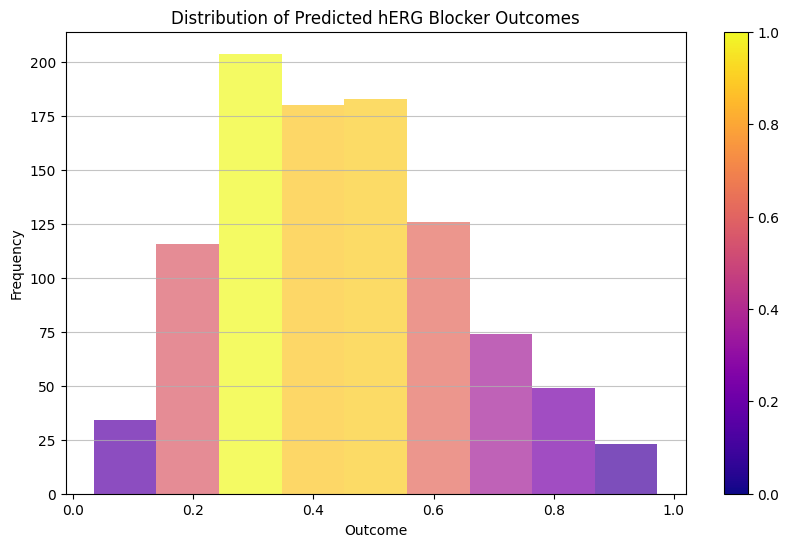

In [ ]:
output = os.path.abspath('../data/final_output.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Plot a histogram of the predicted outcomes with a gradient color scheme
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df['Outcome'], bins=9, alpha=0.7)

# Normalize the color gradient
fracs = n / n.max()

# Set up the colormap
cmap = plt.cm.plasma

# Apply the color gradient to each bar
for i, patch in enumerate(patches):
    color = cmap(fracs[i])
    patch.set_facecolor(color)

# Add a colorbar to show the mapping of colors to values
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0, vmax=1))
sm.set_array([])
plt.colorbar(sm, ax=plt.gca(), orientation='vertical')

plt.xlabel('Outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted hERG Blocker Outcomes')
plt.grid(axis='y', alpha=0.75)
#save
plt.savefig('../figures/hERG_blockers_Distribution.png')
plt.show()

<a id='section-3-2'></a>
### Statistics

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Display basic statistics
statistics = df['Outcome'].describe()

# Print the statistics
print(statistics)

count    989.000000
mean       0.445156
std        0.192860
min        0.034653
25%        0.300990
50%        0.428218
75%        0.574257
max        0.972772
Name: Outcome, dtype: float64


#### Visualize above statistis data for a better understanding

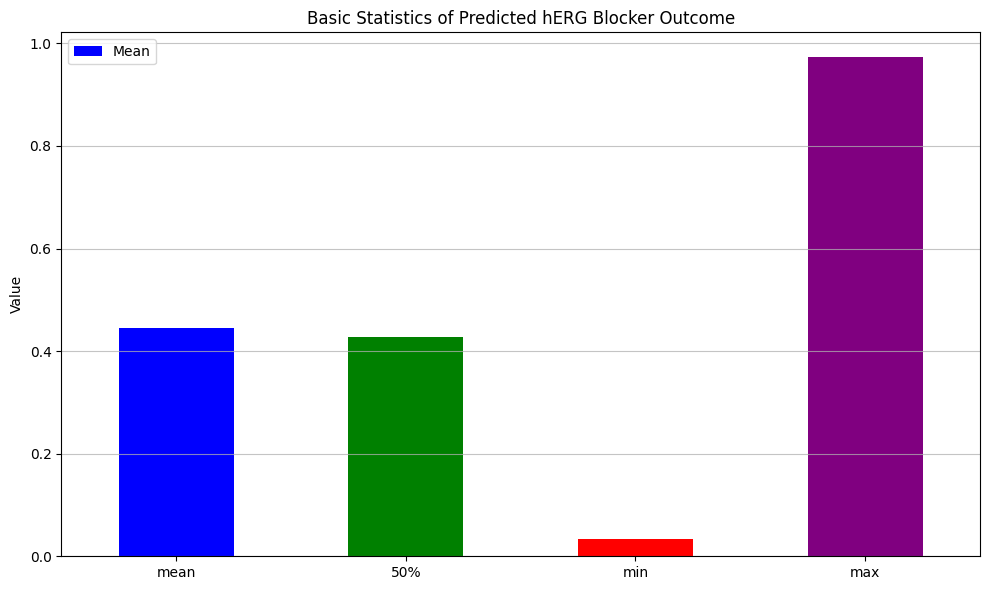

In [ ]:
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Calculate basic statistics
statistics = df['Outcome'].describe()

# Extract the values for visualization
values = statistics[['mean', '50%', 'min', 'max']]

# Plot the values
plt.figure(figsize=(10, 6))
values.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.xticks(rotation=0)
plt.ylabel('Value')
plt.title('Basic Statistics of Predicted hERG Blocker Outcome')
plt.legend(['Mean', 'Median', 'Min', 'Max'])
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.savefig('../figures/Prediction_statistics')
plt.show()

<a id='section-3-3'></a>
### Threshold


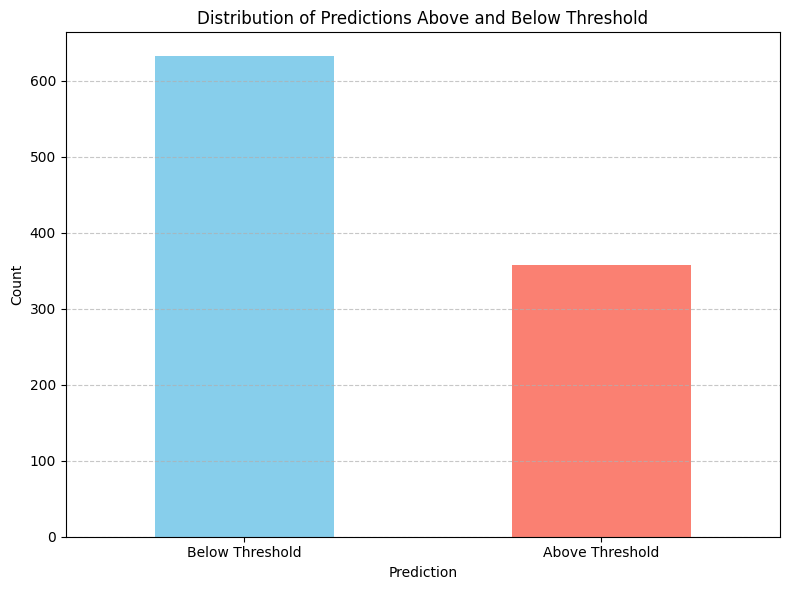

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Define the threshold value
threshold = 0.5 

# Create a new column to indicate if the prediction is above or below the threshold
df['Prediction'] = df['Outcome'] > threshold

# Count the number of predictions above and below the threshold
prediction_counts = df['Prediction'].value_counts()

# Plot a bar chart to visualize the prediction distribution
plt.figure(figsize=(8, 6))
prediction_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Predictions Above and Below Threshold')
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.xticks([0, 1], ['Below Threshold', 'Above Threshold'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../figures/Prediction_threshold')
plt.show()

<a id='section-3-4'></a>
### Frequency

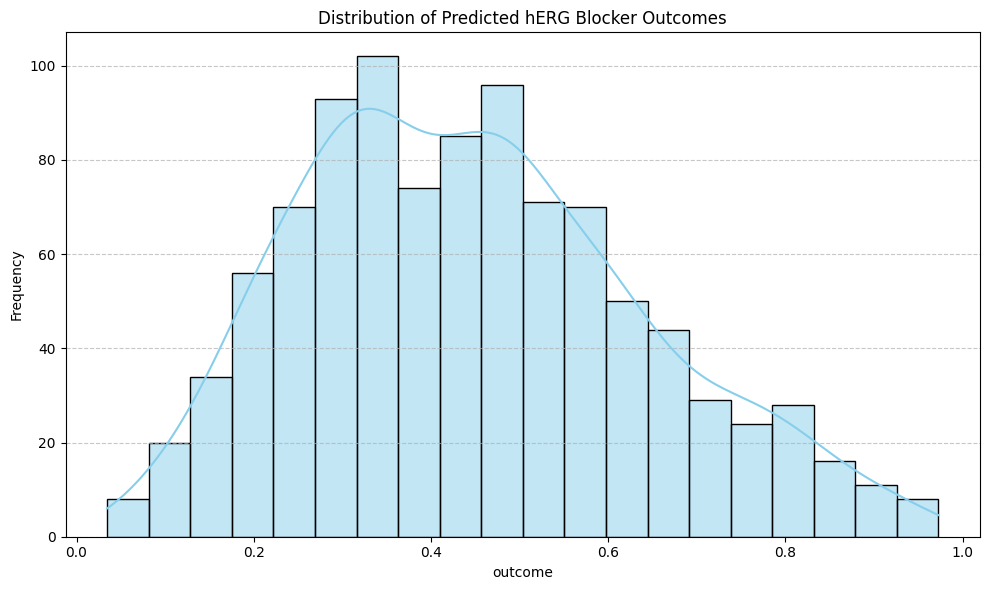

In [ ]:


import pandas as pd
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Create a histogram to visualize the distribution of predicted hERG blocker outcomes
plt.figure(figsize=(10, 6))
sns.histplot(df['Outcome'], bins=20, kde=True, color='skyblue')
plt.xlabel('outcome')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted hERG Blocker Outcomes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('../figures/outcome.png')
plt.show()

<a id='section-3-5'></a>
### Top 10 HERGBLOCKER Molecules

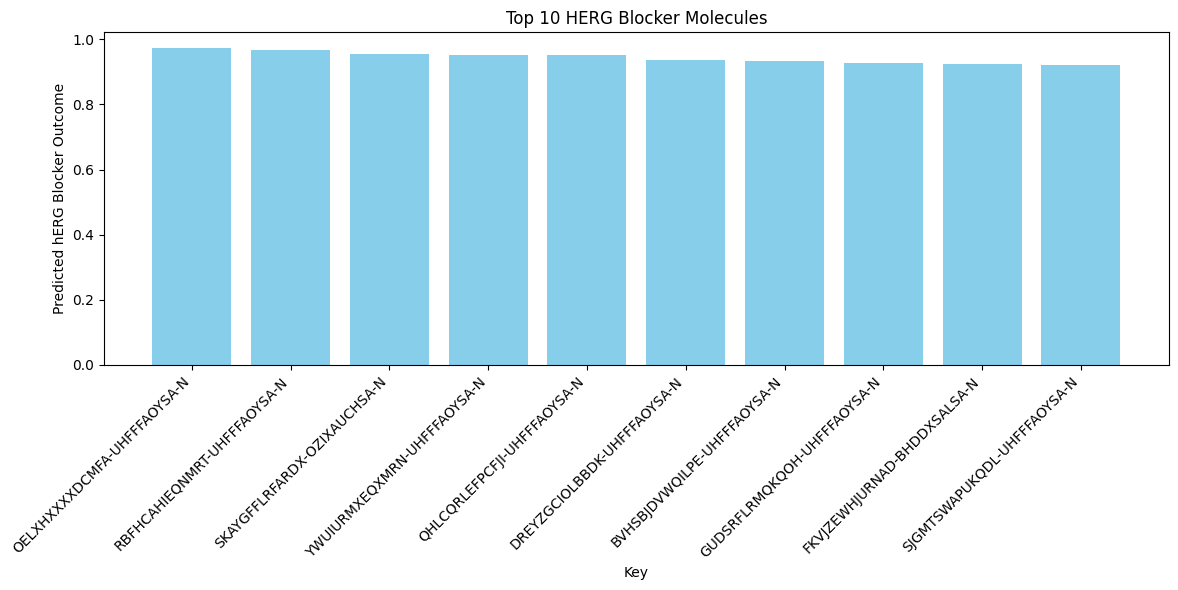

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Sort the molecules based on the predicted outcome in descending order
top_10 = df.sort_values(by='Outcome', ascending=False).head(10)

# Create a column chart to visualize the top 10 molecules
plt.figure(figsize=(12, 6))
plt.bar(top_10['Key'], top_10['Outcome'], color='skyblue')
plt.xlabel('Key')
plt.ylabel('Predicted hERG Blocker Outcome')
plt.title('Top 10 HERG Blocker Molecules')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('../figures/top_10_hERG_Blockers.png')
plt.show()

<a id='section-3-6'></a>
### Top 20 non HERG Blocker molecules

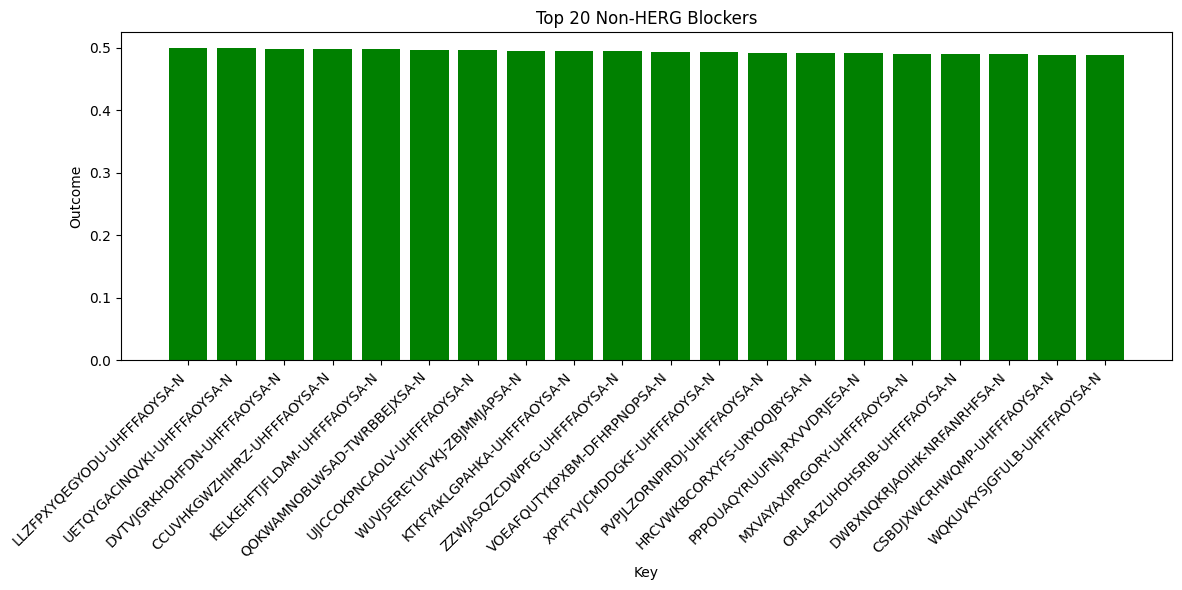

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
output = os.path.abspath('../data/final_output.csv')

# Load the CSV file into a DataFrame
df = pd.read_csv(output)

# Filter out the non-HERG blockers
non_herg_blockers = df[df['Outcome'] < 0.5].nlargest(20, 'Outcome')

# Create a column chart to visualize the top 20 non-HERG blockers
plt.figure(figsize=(12, 6))
plt.bar(non_herg_blockers['Key'], non_herg_blockers['Outcome'], color='green')
plt.xlabel('Key')
plt.ylabel('Outcome')
plt.title('Top 20 Non-HERG Blockers')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.savefig('../figures/top20_nonblockers.png')
plt.show()